In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [8]:
np.random.seed(1)
tf.random.set_seed(1)

In [9]:
def plot_result(history, ymin=None, ymax=None):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)

    plt.plot(range(1,N_EPOCHS+1), history.history['loss'], label='train loss')
    plt.plot(range(1,N_EPOCHS+1), history.history['val_loss'], label='validation loss')
    plt.title('LOSS')
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    if ymin != None and ymax != None:
        plt.ylim(ymin, ymax)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label='train accuracy')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label='validation accuracy')
    plt.title('ACCURACY')
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    if ymin != None and ymax != None:
        plt.ylim(ymin, ymax)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [10]:
# 하이퍼파라미터
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

In [11]:
# Data Loading 및 Dataset 생성
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]
IMAGE_SIZE = 28
N_CLASS = 10  # mnist의 값들은 총 10개이기 때문

In [13]:
X_train = train_image/255.
X_test = test_image/255.

y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [14]:
train_label[0], y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [15]:
# Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)\
                               .repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [17]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))
steps_per_epoch, validation_steps

(600, 100)

# 모델의 크기 변경

In [13]:
# 작은 모델 => Layer층, units수가 적은 것
def create_model():
    model = keras.Sequential()
    
    # Input Layer
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    
    # Hidden Layer
    model.add(keras.layers.Dense(8, activation='relu'))
    
    # Output Layer
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    # Compile
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                 )
    
    return model

In [14]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


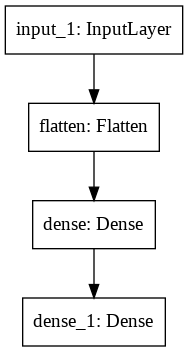

In [15]:
from keras.utils import plot_model
plot_model(model)

In [16]:
# 학습
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps
                   )

Epoch 1/20
600/600 [==============================] - 5s 3ms/step - loss: 1.3855 - accuracy: 0.5793 - val_loss: 0.4234 - val_accuracy: 0.8837
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4011 - accuracy: 0.8877 - val_loss: 0.3323 - val_accuracy: 0.9096
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3259 - accuracy: 0.9069 - val_loss: 0.3055 - val_accuracy: 0.9150
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3025 - accuracy: 0.9154 - val_loss: 0.2922 - val_accuracy: 0.9191
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2817 - accuracy: 0.9201 - val_loss: 0.2804 - val_accuracy: 0.9227
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2820 - accuracy: 0.9208 - val_loss: 0.2761 - val_accuracy: 0.9239
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2704 - accuracy: 0.9244 - val_loss: 0.2732 - val_accuracy: 0.9239
Epoch 

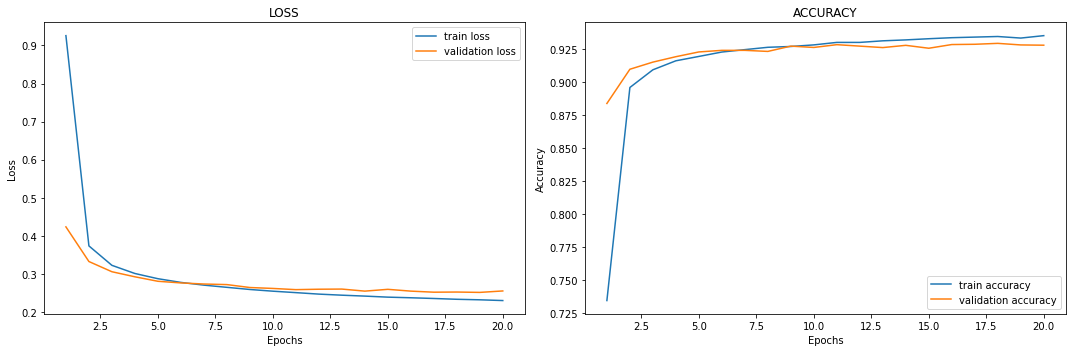

In [17]:
plot_result(history)

In [18]:
# 큰 모델
# Hidden Layer : 4개 - 256, 256, 128, 128
def create_model():
    model = keras.Sequential()
    
    # Input Layer
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    
    # Hidden Layer
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    
    # Output Layer
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    # Compile
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                 )
    
    return model

In [19]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [20]:
# 학습
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps
                   )

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4786 - accuracy: 0.8655 - val_loss: 0.1196 - val_accuracy: 0.9617
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1000 - accuracy: 0.9685 - val_loss: 0.0855 - val_accuracy: 0.9728
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0603 - accuracy: 0.9809 - val_loss: 0.0739 - val_accuracy: 0.9772
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0457 - accuracy: 0.9853 - val_loss: 0.0927 - val_accuracy: 0.9742
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0404 - accuracy: 0.9858 - val_loss: 0.0852 - val_accuracy: 0.9774
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0870 - val_accuracy: 0.9768
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0785 - val_accuracy: 0.9806
Epoch 

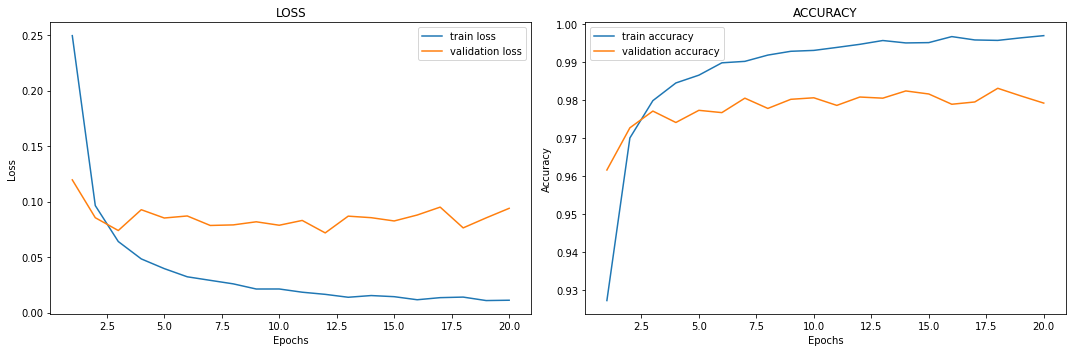

In [21]:
plot_result(history)

# Dropout 적용
- dropout layer는 적용하려는 layer앞에 추가한다.
- dropout 비율은 0 ~ 1 사이의 실수로 지정하는데, 보통 0.2 ~ 0.5의 값을 지정한다.
- dropout이 적용된 모델을 학습시킬때는 epoch수를 더 늘려준다.

In [23]:
DROPOUT_RATE = 0.5

def create_dropout_model():
    model = keras.Sequential()
    
    # Input Layer
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    
    # Hidden Layer
    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(256, activation='relu'))

    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(256, activation='relu'))

    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(128, activation='relu'))

    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(128, activation='relu'))
    
    # Output Layer
    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    # Compile
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                 )
    
    return model

In [24]:
model = create_dropout_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

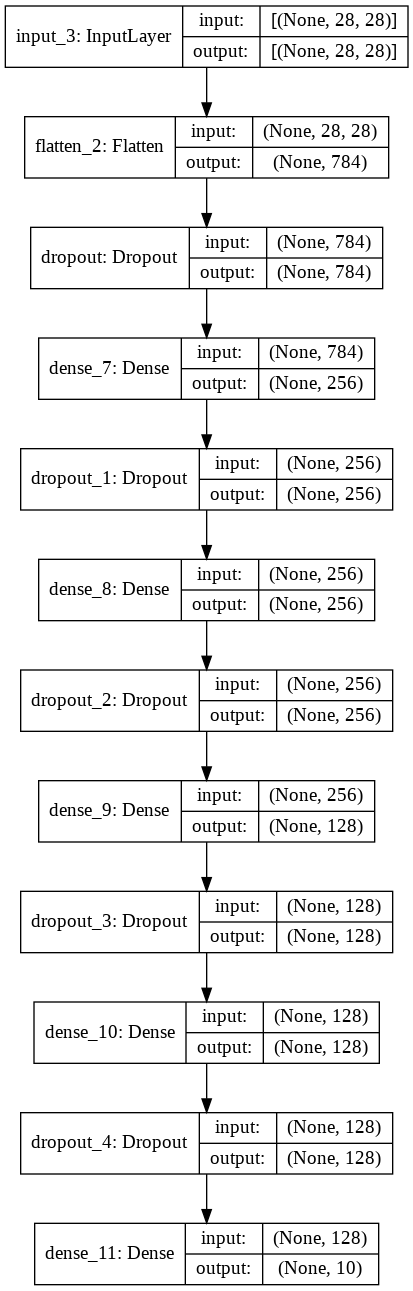

In [26]:
plot_model(model, show_shapes=True)

In [27]:
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 1.7042 - accuracy: 0.3811 - val_loss: 0.3354 - val_accuracy: 0.9149
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.6112 - accuracy: 0.8231 - val_loss: 0.2144 - val_accuracy: 0.9419
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4670 - accuracy: 0.8696 - val_loss: 0.1708 - val_accuracy: 0.9525
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3942 - accuracy: 0.8937 - val_loss: 0.1531 - val_accuracy: 0.9573
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3537 - accuracy: 0.9036 - val_loss: 0.1482 - val_accuracy: 0.9571
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3471 - accuracy: 0.9064 - val_loss: 0.1299 - val_accuracy: 0.9632
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3141 - accuracy: 0.9166 - val_loss: 0.1243 - val_accuracy: 0.9642
Epoch 

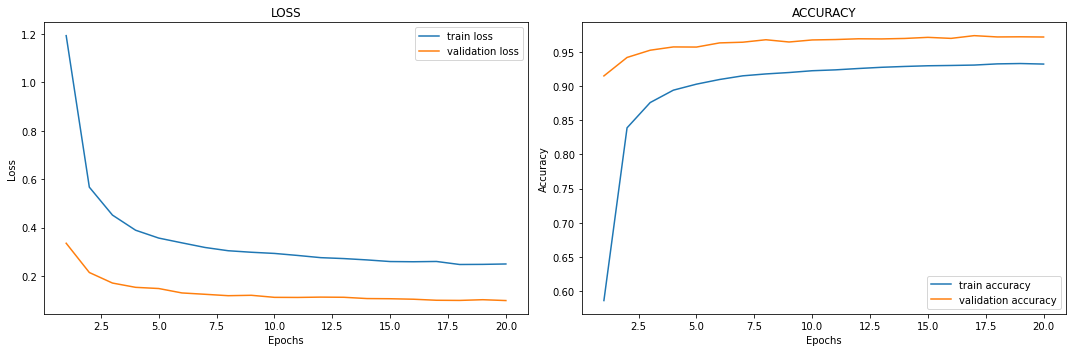

In [28]:
plot_result(history)

In [29]:
model.evaluate(val_dataset)

100/100 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9718


[0.0984523594379425, 0.9718000292778015]

In [30]:
X_test.shape

(10000, 28, 28)

In [31]:
pred_dataset = X_test[:5]
pred_dataset.shape

(5, 28, 28)

In [33]:
pred = model.predict(pred_dataset)
np.argmax(pred, axis=-1)

array([7, 2, 1, 0, 4])

In [34]:
test_label[:5]
# 전부 정답이다.

array([7, 2, 1, 0, 4], dtype=uint8)

# Batch Nomalization

In [18]:
def create_BN_model():
    model = keras.Sequential()

    # Input Layer
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())

    # Hidden Layer
    model.add(keras.layers.Dense(256))  # Fully Connected Layer (Dense Layer)
    model.add(keras.layers.BatchNormalization())  # Batch Nomalization
    model.add(keras.layers.ReLU())  # Activation Layer

    model.add(keras.layers.Dense(256))  # Fully Connected Layer (Dense Layer)
    model.add(keras.layers.BatchNormalization())  # Batch Nomalization
    model.add(keras.layers.ReLU())  # Activation Layer

    model.add(keras.layers.Dense(128))  # Fully Connected Layer (Dense Layer)
    model.add(keras.layers.BatchNormalization())  # Batch Nomalization
    model.add(keras.layers.ReLU())  # Activation Layer

    model.add(keras.layers.Dense(128))  # Fully Connected Layer (Dense Layer)
    model.add(keras.layers.BatchNormalization())  # Batch Nomalization
    model.add(keras.layers.ReLU())  # Activation Layer

    # Output Layer
    model.add(keras.layers.Dense(N_CLASS))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax())

    # Compile
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [19]:
model = create_BN_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0

In [20]:
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 7s 5ms/step - loss: 0.6004 - accuracy: 0.8829 - val_loss: 0.1898 - val_accuracy: 0.9686
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1766 - accuracy: 0.9729 - val_loss: 0.1306 - val_accuracy: 0.9737
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1090 - accuracy: 0.9800 - val_loss: 0.1017 - val_accuracy: 0.9751
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0757 - accuracy: 0.9846 - val_loss: 0.0780 - val_accuracy: 0.9795
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0533 - accuracy: 0.9891 - val_loss: 0.0669 - val_accuracy: 0.9818
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0445 - accuracy: 0.9902 - val_loss: 0.0754 - val_accuracy: 0.9791
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0401 - accuracy: 0.9903 - val_loss: 0.0644 - val_accuracy: 0.9813
Epoch 

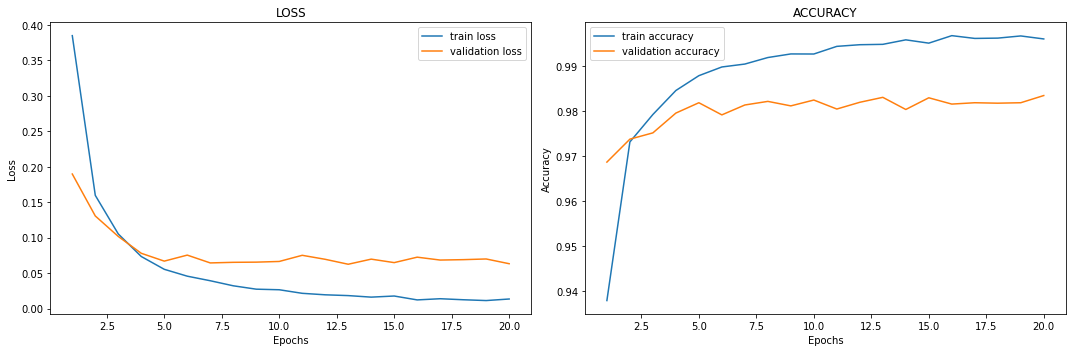

In [22]:
plot_result(history)

# 학습률 조절

In [26]:
LEARNING_RATE = 0.001
N_EPOCHS = 30

def create_model():
    model = keras.Sequential()
    # Input Layer
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())

    # Hiddon Layer
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))

    # Output Layer
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))

    return model

## ExponentialDecay를 사용
- 일정한 step마다 일정한 비율로 학습률을 변경(줄여준다.)

In [27]:
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
                                          initial_learning_rate=LEARNING_RATE,  # 시작 학습률
                                          decay_steps=steps_per_epoch*10,  # 학습률을 몇 step마다 변경시킬 것인지, 10 epoch마다 변경
                                          decay_rate=0.5,  # 학습률의 변화율. (기존학습률 * 지정한 값)
                                          staircase=True,  # True: 매 스텝마다 조금씩 변경, False: 한번에 변경
)
# optimizer의 학습률 대신 lr_scheduler를 설정

In [28]:
model = create_model()

In [29]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps)

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4789 - accuracy: 0.8626 - val_loss: 0.1143 - val_accuracy: 0.9645
Epoch 2/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1001 - accuracy: 0.9687 - val_loss: 0.0907 - val_accuracy: 0.9715
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0619 - accuracy: 0.9810 - val_loss: 0.0806 - val_accuracy: 0.9752
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0447 - accuracy: 0.9855 - val_loss: 0.0834 - val_accuracy: 0.9750
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0836 - val_accuracy: 0.9753
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0272 - accuracy: 0.9915 - val_loss: 0.0845 - val_accuracy: 0.9748
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0236 - accuracy: 0.9921 - val_loss: 0.0764 - val_accuracy: 0.9796
Epoch 

# Learning Rate 조절과 관련 callback 사용
- Callback: 학습 도중 특정 이벤트(변화)가 발생하면 호출되는 기능

## ReduceLROnPlateau callback
- patience epoch 동안 monitor에 지정한 지표가 향상되지 않으면 현재 learning_rate에 factor(0 ~ 1 실수)를 곱해서 learning_rate를 조정한다.


In [32]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
# ReduceLROnPlateau callback 생성
rlp_callback = keras.callbacks.ReduceLROnPlateau(patience=10,  # 10 epoch 동안 기다려라
                                                 monitor='val_loss',  # val_loss가 향상되지 않으면(줄어들지 않으면) 이라는 조건
                                                 factor=0.5,  # 현재 학습률에 0.5를 곱한 것을 새 학습률로 조정해라
                                                 verbose=1  # 학습률이 바뀌면 로그를 출력
                                                 )
# Callback은 fit할 때 적용
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps,
                    callbacks=[rlp_callback])

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4813 - accuracy: 0.8580 - val_loss: 0.1346 - val_accuracy: 0.9614
Epoch 2/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1040 - accuracy: 0.9684 - val_loss: 0.0954 - val_accuracy: 0.9713
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0642 - accuracy: 0.9802 - val_loss: 0.0823 - val_accuracy: 0.9738
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0457 - accuracy: 0.9852 - val_loss: 0.0916 - val_accuracy: 0.9732
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0363 - accuracy: 0.9879 - val_loss: 0.0710 - val_accuracy: 0.9781
Epoch 6/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0267 - accuracy: 0.9912 - val_loss: 0.0758 - val_accuracy: 0.9784
Epoch 7/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0240 - accuracy: 0.9915 - val_loss: 0.1110 - val_accuracy: 0.9676
Epoch 

## LearningRateScheduler callback 사용
- 사용자 정의 학습률 조정 함수를 만들어 적용
- 학습률을 조정하는 함수를 만들어서 callback 생성 시 등록
    - 매개변수
        1. epoch
        2. 현시점의 learning rate
    - 반환값
        - 조정한 learning rate

In [38]:
def user_lr(epoch, lr):
    if epoch < 5:
        return lr
    elif epoch < 10:
        if epoch == 6:
            print('==============Change Learning Rate to ', lr*0.5, ', Epochs: ', epoch)
        return lr*0.5
    elif epoch < 20:
        if epoch == 11:
            print('==============Change Learning Rate to ', lr*0.5, ', Epochs: ', epoch)
        return lr*0.5
    else:
        return lr

In [39]:
lr_scheduler_callback = keras.callbacks.LearningRateScheduler(user_lr)

model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps,
                    callbacks=[lr_scheduler_callback])

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4927 - accuracy: 0.8578 - val_loss: 0.1077 - val_accuracy: 0.9679
Epoch 2/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1007 - accuracy: 0.9693 - val_loss: 0.0945 - val_accuracy: 0.9693
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0645 - accuracy: 0.9798 - val_loss: 0.0824 - val_accuracy: 0.9740
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0428 - accuracy: 0.9862 - val_loss: 0.0796 - val_accuracy: 0.9763
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0371 - accuracy: 0.9877 - val_loss: 0.0777 - val_accuracy: 0.9760
Epoch 6/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0194 - accuracy: 0.9944 - val_loss: 0.0629 - val_accuracy: 0.9827
Epoch 7/30
==============Change Learning Rate to  0.0002500000118743628 , Epochs:  6
600/600 [==============================] - 3s 4ms/step - loss: 